<a href="https://colab.research.google.com/github/johanv26/analisis_numerico/blob/master/3_9_Problems_with_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#paquetes de trabajo
!pip install sympy
import numpy as np
import sympy as sp
from scipy import optimize
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

Funciones de gradiente descente:

In [80]:
def descent_grad_optim_step(x, f, grad, epsi, max_iter): #Gradiente descendiente paso optimizado  
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  for i in range(max_iter):
    g = grad(*x)
    def phi(s):
      params=x-s*g.T
      params=params[0,:]  #change into single array
      #return f(x[0]-s*g[0],x[1]-s*g[1],x[2]-s*g[2])
      return f(*params)
    alpha = optimize.fminbound(phi, 0, 10)
  
    x = x - alpha * g.T
    x=x[0,:]
 
    xs[i+1,:] = x

    tol = np.linalg.norm(g)
    if tol < epsi:
      
      break
  return xs,i+1

In [81]:
def descent_grad_fixed_step(x, grad, a, max_iter, epsi): #Gradiente desendiente paso fijo    
  xs = np.zeros((1 + max_iter, len(x)))
  xs[0,:] = x
  
  for i in range(max_iter):
      g=grad(*x)
      x = x - a * g.T
      x=x[0,:]
      xs[i+1,:] = x
      tol = np.linalg.norm(grad(*x))
      if tol < epsi:
        break
  return xs,i+1

Funciones de gradiente y hessiano

In [82]:

def gradient(f,*variables):
  n=len(variables)
  m=1
  grad=sp.zeros(n,m)
  i=0
  for var in variables:
    grad[i,0]=sp.diff(f,var)
    i+=1
  
  return grad

def hessian(f,*variables):
  n=len(variables)
  m=n
  hess=sp.zeros(n,m)
  
  for i in range(0,n):
    for j in range(0,n):
  
      first_diff=sp.diff(f,variables[j])
      second_diff=sp.diff(first_diff,variables[i])
      hess[i,j]=second_diff
  
  return hess

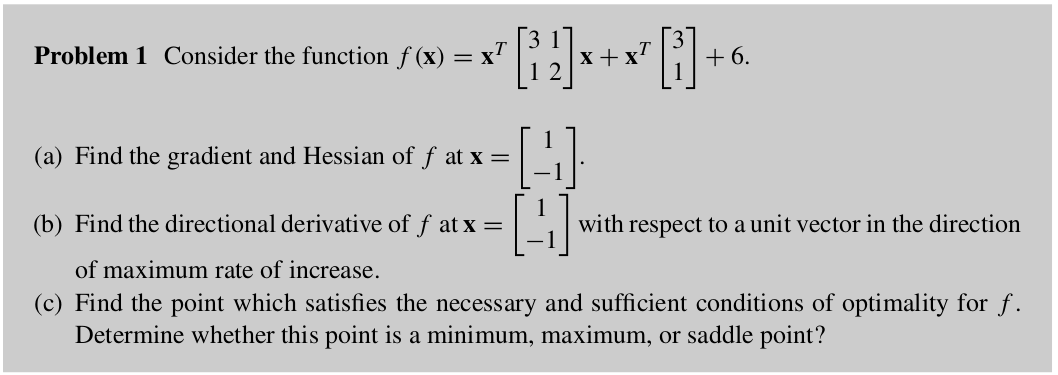

#Solucion a)

In [83]:
sp.init_printing()
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
x=sp.Matrix([x1,x2])
a=sp.Matrix([[3,1],[1,2]])
b=sp.Matrix([3,1])
f=x.T*a*x +x.T*b + sp.Matrix([6])

print('La funcion dada es : \n',f)
grad=gradient(f,x1,x2)
print('El gradiente calculado es : \n',grad)
hess=hessian(f,x1,x2)
print('El hessiano calculado es: \n',hess)
grad_val=sp.lambdify([x1,x2],grad)
hess_val=sp.lambdify([x1,x2],hess)

gradx0=grad_val(1,-1)
print('El gradiente en el punto (1,-1) es : \n',gradx0)
hessx0=hess_val(1,-1)

print('El hessiano en el punto (1,-1) es : \n',hessx0)

La funcion dada es : 
 Matrix([[x_1*(3*x_1 + x_2) + 3*x_1 + x_2*(x_1 + 2*x_2) + x_2 + 6]])
El gradiente calculado es : 
 Matrix([[6*x_1 + 2*x_2 + 3], [2*x_1 + 4*x_2 + 1]])
El hessiano calculado es: 
 Matrix([[6, 2], [2, 4]])
El gradiente en el punto (1,-1) es : 
 [[ 7]
 [-1]]
El hessiano en el punto (1,-1) es : 
 [[6 2]
 [2 4]]


[[-20.   -19.75 -19.5  ...  19.25  19.5   19.75]
 [-20.   -19.75 -19.5  ...  19.25  19.5   19.75]
 [-20.   -19.75 -19.5  ...  19.25  19.5   19.75]
 ...
 [-20.   -19.75 -19.5  ...  19.25  19.5   19.75]
 [-20.   -19.75 -19.5  ...  19.25  19.5   19.75]
 [-20.   -19.75 -19.5  ...  19.25  19.5   19.75]]


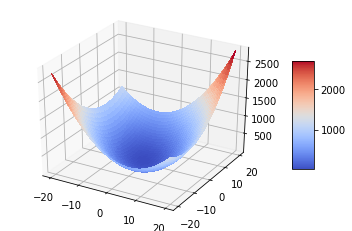

In [84]:


from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# Make data.
XX = np.arange(-20, 20, 0.25)
YY= np.arange(-20, 20, 0.25)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],f)
print(X)
#print(Y)
Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z[0,0,:], cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
Z.shape
Z[0,0,:].shape
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)




#Solucion b)

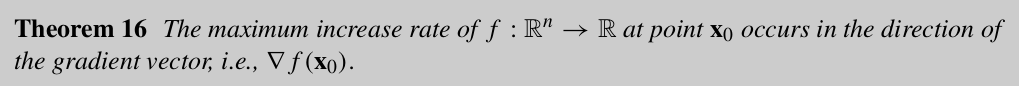

In [85]:
vector_max_increase_rate=grad_val(1,-1)

#Procedo a normalizar
vector_norm=vector_max_increase_rate/np.linalg.norm(vector_max_increase_rate)
vector_norm
print('El vector de maximo crecimiento, osea gradiente en (1,-1)es : \n',
      vector_max_increase_rate)
print('El vector de maximo crecimiento normalizado  es : \n',vector_norm)
print('La norma del vector es ',np.linalg.norm(vector_norm))

derivada_direccional=grad.T.dot(vector_norm)
print('La expresion derivada direccional respecto a ese vector es : \n',derivada_direccional)

derivada_direccional_val=sp.lambdify([x1,x2],derivada_direccional)
derivada_direccional_val2=grad_val(1,-1).T.dot(vector_norm)
print('La expresion evaluada de derivada direccional respecto a ese vector es : \n'
,derivada_direccional_val2)


El vector de maximo crecimiento, osea gradiente en (1,-1)es : 
 [[ 7]
 [-1]]
El vector de maximo crecimiento normalizado  es : 
 [[ 0.98994949]
 [-0.14142136]]
La norma del vector es  0.9999999999999999
La expresion derivada direccional respecto a ese vector es : 
 5.65685424949238*x_1 + 1.41421356237309*x_2 + 2.82842712474619
La expresion evaluada de derivada direccional respecto a ese vector es : 
 [[7.07106781]]


#Solucion C)

In [86]:
print('TEneindo en cuenta el termino del gradiente \n',grad)

raices_grad=sp.solve(grad)
print('Hallamos las raices del gradiente como \n',raices_grad)

TEneindo en cuenta el termino del gradiente 
 Matrix([[6*x_1 + 2*x_2 + 3], [2*x_1 + 4*x_2 + 1]])
Hallamos las raices del gradiente como 
 {x_1: -1/2, x_2: 0}


In [87]:
print('Teniendo en cuenta  el hessiano :,',hess)
print('Consideramos los criterios para evaluar los criterios de optimos '
' en ese punto(-1/2,0)')


Teniendo en cuenta  el hessiano :, Matrix([[6, 2], [2, 4]])
Consideramos los criterios para evaluar los criterios de optimos  en ese punto(-1/2,0)


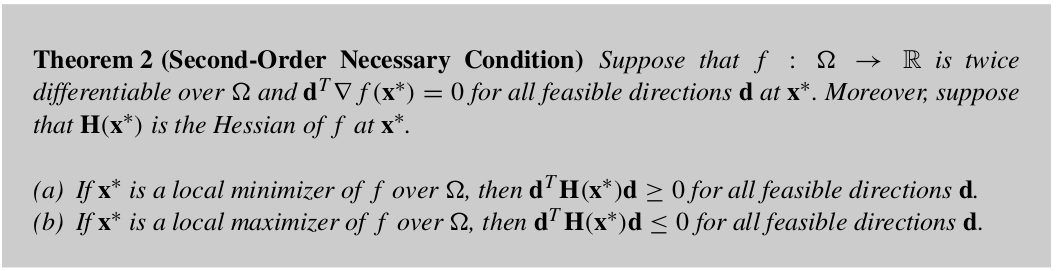

In [88]:
d1=sp.Symbol('d_1')
d2=sp.Symbol('d_2')
d=sp.Matrix([d1,d2])

condition=d.T*hess*d
direction_pos=sp.solve(condition)
print('Se entiende la expresion de posibles direcciones dada segun la ecuacion: \n'
,condition)
print('Teniendo la expresion evaluamos si en todas las posibilidades la '
' direccion del hessiano es positivo, no obstante  para asegurar se usa :')

Se entiende la expresion de posibles direcciones dada segun la ecuacion: 
 Matrix([[d_1*(6*d_1 + 2*d_2) + d_2*(2*d_1 + 4*d_2)]])
Teniendo la expresion evaluamos si en todas las posibilidades la  direccion del hessiano es positivo, no obstante  para asegurar se usa :


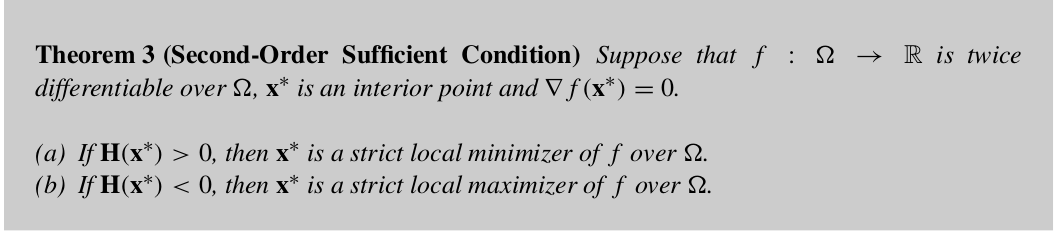

In [89]:
eigenvalues=hess.eigenvals()
print('Los eigenvalores de la matriz hessiana son: \n',eigenvalues)
print('Al ser positivos, la matrix hessiana se considera positiva en ese punto '
'por lo que se le puede considerar minimo')

Los eigenvalores de la matriz hessiana son: 
 {-sqrt(5) + 5: 1, sqrt(5) + 5: 1}
Al ser positivos, la matrix hessiana se considera positiva en ese punto por lo que se le puede considerar minimo


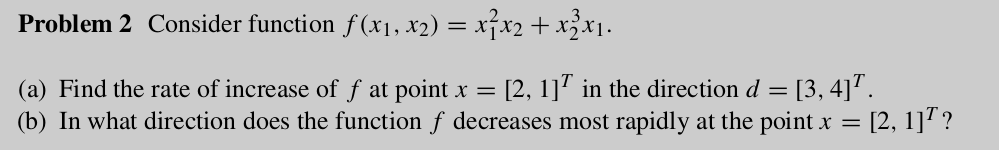

# Solucion a-)

In [90]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=(x1**2*x2) + (x2**3*x1)
grad=gradient(f,x1,x2)
grad_val=sp.lambdify([x1,x2],grad)
grad_point=grad_val(2,1)
vectord=np.array([[3],[4]])

d_normalice=vectord/np.linalg.norm(vectord)


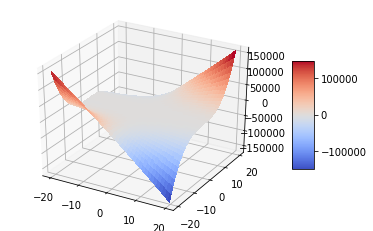

In [91]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# Make data.
XX = np.arange(-20, 20, 0.25)
YY= np.arange(-20, 20, 0.25)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


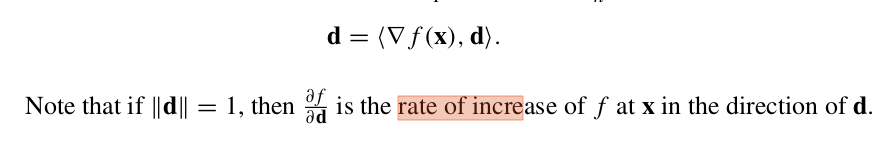

In [92]:

print('El vector director es   : \n',vectord)
print('El vector director normalizado es  : \n',d_normalice)
print('El gradiente  en el punto (2,1 )  es : \n',grad_point)

rate_direction_d=grad_point.T.dot(d_normalice) #Grad has to be transpose
#* makes the point point multplicaiton, dot makes the matrix multiplication
#z=grad_point*d.T, grad_point*d
rate_direction_d
print('La derivada direccional respecto a ese vector es : \n'
      ,rate_direction_d)


El vector director es   : 
 [[3]
 [4]]
El vector director normalizado es  : 
 [[0.6]
 [0.8]]
El gradiente  en el punto (2,1 )  es : 
 [[17]
 [ 9]]
La derivada direccional respecto a ese vector es : 
 [[17.4]]


#Solucion b-)

In [93]:
min_vector_direction=-grad_point
min_vector_direction_norm=min_vector_direction/np.linalg.norm(min_vector_direction)
decrease_rate_min=grad_point.T.dot(min_vector_direction_norm)

print('La menor tasa de cambio es en direccion del vector menos gradiente en ' 
'el punto(2,1). Este vector es : \n'
      ,min_vector_direction)
print('El vector al ser normalizado se ve : \n'
      ,min_vector_direction_norm)

print('La tasa de cambio en direccion de ese vector desde el punto(2,1)es  : \n'
      ,decrease_rate_min)

La menor tasa de cambio es en direccion del vector menos gradiente en el punto(2,1). Este vector es : 
 [[-17]
 [ -9]]
El vector al ser normalizado se ve : 
 [[-0.88378792]
 [-0.46788772]]
La tasa de cambio en direccion de ese vector desde el punto(2,1)es  : 
 [[-19.23538406]]


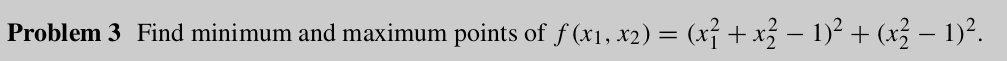

In [94]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=(x1**2+x2**2-1)**2 + (x2**2-1)**2 
grad=gradient(fx,x1,x2)
fx_val=sp.lambdify([x1,x2],fx)
grad_val=sp.lambdify([x1,x2],grad)
##change the descent method into more variables
x0 = np.array([4,8])
epsi = 0.01;
max_iter = 10000
res1 = descent_grad_optim_step(x0, fx_val, grad_val, epsi, max_iter)
xmin = res1[0]
iter = res1[1]


print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]}')

El minimo global se encuentra en x1=-0.10914710950071563, x2=0.9970633521654858


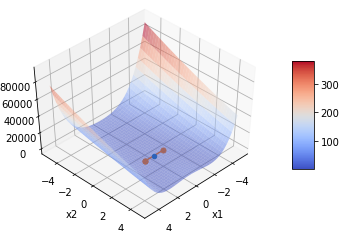

In [102]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
x1_vals=xmin[0:iter,0]
x2_vals=xmin[0:iter,1]
z=fx_val(x1_vals,x2_vals)
#print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
XX = np.arange(-5, 5, 0.25)
YY= np.arange(-5, 5, 0.25)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

suf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
ax.plot(x1_vals, x2_vals, z, label='Convergencia  ',
marker='o',markersize=5)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.scatter(0,1,0)
# plot a 3d scatter plot



ax.view_init(45, 45)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

In [96]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=(x1**2+x2**2-1)**2 + (x2**2-1)**2
fx_invert=-fx 
grad=gradient(fx_invert,x1,x2)
fx_val=sp.lambdify([x1,x2],fx_invert)
grad_val=sp.lambdify([x1,x2],grad)
##change the descent method into more variables
x0 = np.array([4,8])
epsi = 0.01;
max_iter = 1000
res1 = descent_grad_optim_step(x0, fx_val, grad_val, epsi, max_iter)
xmin = res1[0]
iter = res1[1]


print(f'El maximo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]}')

/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1814: RuntimeWarning: invalid value encountered in double_scalars
  r = (xf - nfc) * (fx - ffulc)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:1815: RuntimeWarning: invalid value encountered in double_scalars
  q = (xf - fulc) * (fx - fnfc)
/usr/local/lib/python3.6/dist-packages/numpy/__init__.py:1: RuntimeWarning: overflow encountered in double_scalars
  """


El maximo global se encuentra en x1=inf, x2=inf


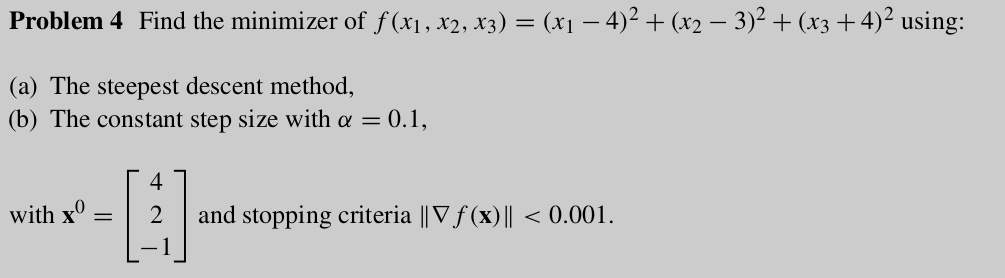

#Solucion a-) Gradiente descendente


In [97]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
x3=sp.Symbol('x_3')
fx=(x1-4)**2 + (x2-3)**2 + (x3+4)**2
grad=gradient(fx,x1,x2,x3)
fx_val=sp.lambdify([x1,x2,x3],fx)
grad_val=sp.lambdify([x1,x2,x3],grad)# Turn into a function with that name
value=grad_val(1,2,3)
grad
#def f_values(fx_points)
type(value)
##change the descent method into more variables
x0 = np.array([4,2,-1])
epsi = 0.001;
max_iter = 1000
g=grad_val(4,2,-1)

res1 = descent_grad_optim_step(x0, fx_val, grad_val, epsi, max_iter)
xmin = res1[0]
iter = res1[1]


print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]} y ',f'x3={xmin[iter,2]}.Luego de {iter} iteraciones')

El minimo global se encuentra en x1=4.0, x2=3.0 y  x3=-4.0.Luego de 2 iteraciones


# Solucion b-)gradiente descente con paso fijo




In [98]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
x3=sp.Symbol('x_3')
fx=(x1-4)**2 + (x2-3)**2 + (x3+4)**2
grad=gradient(fx,x1,x2,x3)
fx_val=sp.lambdify([x1,x2,x3],fx)
grad_val=sp.lambdify([x1,x2,x3],grad)# Turn into a function with that name
value=grad_val(1,2,3)
grad
#def f_values(fx_points)
type(value)
##change the descent method into more variables
x0 = np.array([4,3,-1])
print(grad_val(*x0))
print(x0-grad_val(*x0))#This could be subs point to point
print(x0-grad_val(*x0).T)#This could be rest point to point

epsi = 0.001;
max_iter = 1000
g=grad_val(4,2,-1)
step=0.1
res1 = descent_grad_fixed_step(x0, grad_val,step, max_iter,epsi)
xmin = res1[0]
iter = res1[1]


print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]} y ',f'x3={xmin[iter,2]}.Luego de {iter} iteraciones')


[[0]
 [0]
 [6]]
[[ 4  3 -1]
 [ 4  3 -1]
 [-2 -3 -7]]
[[ 4  3 -7]]
El minimo global se encuentra en x1=4.0, x2=3.0 y  x3=-3.9995015395015807.Luego de 39 iteraciones


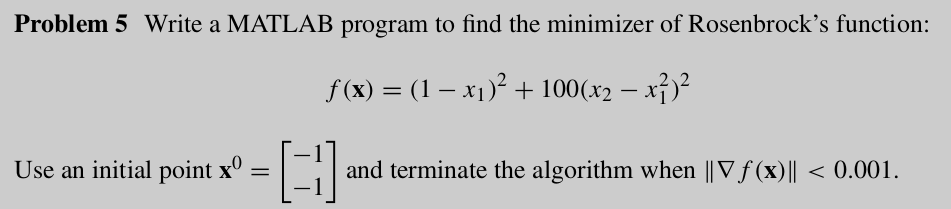

In [99]:
x1=sp.Symbol('x_1')
x2=sp.Symbol('x_2')
fx=(1-x1)**2 + 100*(x2-x1**2)**2 
grad=gradient(fx,x1,x2)
fx_val=sp.lambdify([x1,x2],fx)
grad_val=sp.lambdify([x1,x2],grad)
##change the descent method into more variables
x0 = np.array([-1,1])
epsi = 0.001;
max_iter = 10000
res1 = descent_grad_optim_step(x0, fx_val, grad_val, epsi, max_iter)
xmin = res1[0]
iter = res1[1]


print(f'El minimo global se encuentra en x1={xmin[iter,0]},',
      f'x2={xmin[iter,1]}.Luego de {iter} iteraciones')

El minimo global se encuentra en x1=0.9999988283439782, x2=0.9999976539057863.Luego de 3 iteraciones


[-1.          0.99999412  0.99999883] [1.         1.         0.99999765] [4.00000000e+00 1.38616256e-08 1.37583985e-12]


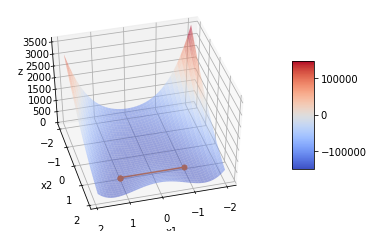

In [100]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from random import random, seed
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
x1_vals=xmin[0:iter,0]
x2_vals=xmin[0:iter,1]
z=fx_val(x1_vals,x2_vals)
print(x1_vals,x2_vals,z)
#print(xmin)

# Make data.
XX = np.arange(-2, 2, 0.1)
YY= np.arange(-2, 2, 0.1)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')

suf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,alpha=0.5)
ax.plot(x1_vals, x2_vals, z, label='Convergencia  ',
marker='o',markersize=5)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)


# plot a 3d scatter plot



ax.view_init(45, 75)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z');
plt.show()

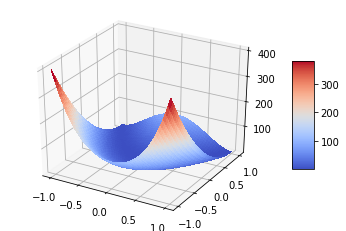

In [101]:

from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
# Make data.
XX = np.arange(-1, 1, 0.25e-2)
YY= np.arange(-1, 1, 0.25e-2)

X, Y = np.meshgrid(XX, YY)
F=sp.lambdify([x1,x2],fx)

Z=F(X,Y)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf=ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
